### В данной домашней работе Вам предстоит отработать следующие 2 навыка: работа с пропущенными значениями и анализ выбросов.

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('processed_data_with_new_features.csv', index_col='id')

In [2]:
data.head()

vendor_id  passenger_count  store_and_fwd_flag  distance_km  \
id                                                                       
id2875421          1       930.399753                   0     1.500479   
id2377394          0       930.399753                   0     1.807119   
id3858529          1              NaN                   0     6.392080   
id3504673          1              NaN                   0     1.487155   
id2181028          1       930.399753                   0     1.189925   

           log_trip_duration  anomaly  traffic_jam  day_of_week_1  \
id                                                                  
id2875421           6.122493        0            0              0   
id2377394           6.498282        0            0              0   
id3858529           7.661527        0            1              1   
id3504673           6.063785        0            0              0   
id2181028           6.077642        0            0              0   

           day_of_week_2  day_of_week_3  ...  hour_19  hour_20  hour_21  \
id                                       ...                              
id2875421              0              0  ...        0        0        0   
id2377394              0              0  ...        0        0        0   
id3858529              0              0  ...        0        0        0   
id3504673              1              0  ...        1        0        0   
id2181028              0              0  ...        0        0        0   

           hour_22  hour_23  month_2  month_3  month_4  month_5  month_6  
id                                                                        
id2875421        0        0        0        1        0        0        0  
id2377394        0        0        0        0        0        0        1  
id3858529        0        0        0        0        0        0        0  
id3504673        0        0        0        0        1        0        0  
id2181028        0        0        0        1        0        0        0  

[5 rows x 41 columns]

Никудышный гном случайно пролил кофе на папку с данными и кодом. К несчастью, из-за этого они с братьями потеряли кучу информации в столбиках **passenger_count** и **distance_km**.

In [3]:
### Выведите количество пропусков в данных колонках
### На всякий случай, проверьте целостность данных в остальных

### Your code is here
data.isna().sum()

vendor_id                  0
passenger_count       145864
store_and_fwd_flag         0
distance_km           145864
log_trip_duration          0
anomaly                    0
traffic_jam                0
day_of_week_1              0
day_of_week_2              0
day_of_week_3              0
day_of_week_4              0
day_of_week_5              0
day_of_week_6              0
hour_1                     0
hour_2                     0
hour_3                     0
hour_4                     0
hour_5                     0
hour_6                     0
hour_7                     0
hour_8                     0
hour_9                     0
hour_10                    0
hour_11                    0
hour_12                    0
hour_13                    0
hour_14                    0
hour_15                    0
hour_16                    0
hour_17                    0
hour_18                    0
hour_19                    0
hour_20                    0
hour_21                    0
hour_22       

Начнем с **passenger_count**. Вообще говоря, изначально это была категориальная колонка, к которой мы применили технику OneHotEncoder. Чтобы избавиться от пропусков в данных, конечно, можно просто убрать все объекты, в которых есть пропуски, но тогда мы потеряем ценную информацию. 

Воспользуйтесь относительно простым приемом из лекции: в указанной колонке заполните пропуски самым *популярным* значением среди неотсутствующих.

In [4]:
### Your code is here
most_popular_value_for_passenger = data['passenger_count'].value_counts().index[0]
data['passenger_count'] = data['passenger_count'].fillna(most_popular_value_for_passenger)

In [5]:
data.isna().sum()

vendor_id                  0
passenger_count            0
store_and_fwd_flag         0
distance_km           145864
log_trip_duration          0
anomaly                    0
traffic_jam                0
day_of_week_1              0
day_of_week_2              0
day_of_week_3              0
day_of_week_4              0
day_of_week_5              0
day_of_week_6              0
hour_1                     0
hour_2                     0
hour_3                     0
hour_4                     0
hour_5                     0
hour_6                     0
hour_7                     0
hour_8                     0
hour_9                     0
hour_10                    0
hour_11                    0
hour_12                    0
hour_13                    0
hour_14                    0
hour_15                    0
hour_16                    0
hour_17                    0
hour_18                    0
hour_19                    0
hour_20                    0
hour_21                    0
hour_22       

С колонкой **distance_km** поступим более интересным способом!

Чтобы заполнить пропуск в данной колонке для того или иного объекта, можно находить наиболее похожий на него объект и подглядывать в его значение **distance_km**. Для того, чтобы понять, насколько объекты похожи друг на друга, необходимо использовать Евклидово расстояние между этими самыми объектами в пространстве всех признаков!

С учетом количества объектов в нашем датасете и признаков, посчитать попарные расстояния будет мега-сложно. Поэтому давайте называть объекты похожими, если они принадлежат одной категории, составленной из следующих колонок:

1. vendor_id
2. store_and_fwd_flag
3. traffic_jam
4. month_2
5. month_3
6. month_4
7. month_5
8. month_6

Внутри каждой группы найдите среднее значение признака **distance_km** и заполните NaN'ы в объектах с пропуском в соответствии с тем, к какой категории относится данный объект. Похожее упражнение мы делали на практике в занятии!

**Hint**: достаточно просто взять group by по указанным выше категориальным колонкам и верно вставить полученный результат в исходную табличку.

P.S. Колонки выбраны случайным образом. Можно было взять и другую комбинацию.

In [6]:
data.head()

vendor_id  passenger_count  store_and_fwd_flag  distance_km  \
id                                                                       
id2875421          1       930.399753                   0     1.500479   
id2377394          0       930.399753                   0     1.807119   
id3858529          1       930.399753                   0     6.392080   
id3504673          1       930.399753                   0     1.487155   
id2181028          1       930.399753                   0     1.189925   

           log_trip_duration  anomaly  traffic_jam  day_of_week_1  \
id                                                                  
id2875421           6.122493        0            0              0   
id2377394           6.498282        0            0              0   
id3858529           7.661527        0            1              1   
id3504673           6.063785        0            0              0   
id2181028           6.077642        0            0              0   

           day_of_week_2  day_of_week_3  ...  hour_19  hour_20  hour_21  \
id                                       ...                              
id2875421              0              0  ...        0        0        0   
id2377394              0              0  ...        0        0        0   
id3858529              0              0  ...        0        0        0   
id3504673              1              0  ...        1        0        0   
id2181028              0              0  ...        0        0        0   

           hour_22  hour_23  month_2  month_3  month_4  month_5  month_6  
id                                                                        
id2875421        0        0        0        1        0        0        0  
id2377394        0        0        0        0        0        0        1  
id3858529        0        0        0        0        0        0        0  
id3504673        0        0        0        0        1        0        0  
id2181028        0        0        0        1        0        0        0  

[5 rows x 41 columns]

In [8]:
### Положим колонки, по которым сверяем похожесть объектов,
### в переменную cols_to_group

cols_to_group = ['vendor_id', 'store_and_fwd_flag', 'traffic_jam', 'month_2',
                 'month_3', 'month_4', 'month_5', 'month_6']

### Сгруппируем датасет по этим колонкам и посчитаем
### среднее значение таргета

mapping = data[~data.distance_km.isna()].groupby(cols_to_group)['distance_km'].mean()

mapping = mapping.reset_index()

mapping

vendor_id  store_and_fwd_flag  traffic_jam  month_2  month_3  month_4  \
0           0                   0            0        0        0        0   
1           0                   0            0        0        0        0   
2           0                   0            0        0        0        0   
3           0                   0            0        0        0        1   
4           0                   0            0        0        1        0   
5           0                   0            0        1        0        0   
6           0                   0            1        0        0        0   
7           0                   0            1        0        0        0   
8           0                   0            1        0        0        0   
9           0                   0            1        0        0        1   
10          0                   0            1        0        1        0   
11          0                   0            1        1        0        0   
12          0                   1            0        0        0        0   
13          0                   1            0        0        0        0   
14          0                   1            0        0        0        0   
15          0                   1            0        0        0        1   
16          0                   1            0        0        1        0   
17          0                   1            0        1        0        0   
18          0                   1            1        0        0        0   
19          0                   1            1        0        0        0   
20          0                   1            1        0        0        0   
21          0                   1            1        0        0        1   
22          0                   1            1        0        1        0   
23          0                   1            1        1        0        0   
24          1                   0            0        0        0        0   
25          1                   0            0        0        0        0   
26          1                   0            0        0        0        0   
27          1                   0            0        0        0        1   
28          1                   0            0        0        1        0   
29          1                   0            0        1        0        0   
30          1                   0            1        0        0        0   
31          1                   0            1        0        0        0   
32          1                   0            1        0        0        0   
33          1                   0            1        0        0        1   
34          1                   0            1        0        1        0   
35          1                   0            1        1        0        0   

    month_5  month_6  distance_km  
0         0        0     3.323767  
1         0        1     3.463570  
2         1        0     3.507959  
3         0        0     3.389926  
4         0        0     3.405043  
5         0        0     3.322016  
6         0        0     3.139797  
7         0        1     3.244716  
8         1        0     3.258492  
9         0        0     3.253105  
10        0        0     3.272150  
11        0        0     3.027659  
12        0        0     4.820545  
13        0        1     5.069589  
14        1        0     5.394954  
15        0        0     4.979302  
16        0        0     4.588824  
17        0        0     4.619466  
18        0        0     5.234392  
19        0        1     5.272086  
20        1        0     5.453626  
21        0        0     5.252186  
22        0        0     5.247602  
23        0        0     4.937971  
24        0        0     3.438573  
25        0        1     3.591088  
26        1        0     3.606102  
27        0        0     3.468311  
28        0        0     3.466395  
29        0        0     3.365116  
30        0        0     3.183494  
31

In [9]:
merged = pd.merge(data,
                  mapping,
                  left_on=list(mapping.columns[:-1]),
                  right_on=list(mapping.columns[:-1]),
                  how='left')

merged

vendor_id  passenger_count  store_and_fwd_flag  distance_km_x  \
0                1       930.399753                   0       1.500479   
1                0       930.399753                   0       1.807119   
2                1       930.399753                   0       6.392080   
3                1       930.399753                   0       1.487155   
4                1       930.399753                   0       1.189925   
...            ...              ...                 ...            ...   
1458639          1       930.399753                   0       1.226296   
1458640          0       930.399753                   0       6.056935   
1458641          1       930.399753                   0       7.832952   
1458642          0       930.399753                   0       1.093786   
1458643          0       930.399753                   0       1.135453   

         log_trip_duration  anomaly  traffic_jam  day_of_week_1  \
0                 6.122493        0            0              0   
1                 6.498282        0            0              0   
2                 7.661527        0            1              1   
3                 6.063785        0            0              0   
4                 6.077642        0            0              0   
...                    ...      ...          ...            ...   
1458639           6.658011        0            0              0   
1458640           6.486161        0            0              0   
1458641           6.639876        0            0              0   
1458642           5.924256        0            0              1   
1458643           5.293305        0            0              1   

         day_of_week_2  day_of_week_3  ...  hour_20  hour_21  hour_22  \
0                    0              0  ...        0        0        0   
1                    0              0  ...        0        0        0   
2                    0              0  ...        0        0        0   
3                    1              0  ...        0        0        0   
4                    0              0  ...        0        0        0   
...                ...            ...  ...      ...      ...      ...   
1458639              0              0  ...        0        0        0   
1458640              0              0  ...        0        0        0   
1458641              0              0  ...        0        0        0   
1458642              0              0  ...        0        0        0   
1458643              0              0  ...        0        0        0   

         hour_23  month_2  month_3  month_4  month_5  month_6  distance_km_y  
0              0        0        1        0        0        0       3.466395  
1              0        0        0        0        0        1       3.463570  
2              0        0        0        0        0        0       3.183494  
3              0        0        0        1        0        0       3.468311  
4              0        0        1        0        0        0       3.466395  
...          ...      ...      ...      ...      ...      ...            ...  
1458639        0        0        0        1        0        0       3.468311  
1458640        0        0        0        0        0        0       3.323767  
1458641        0        0        0        1        0        0       3.468311  
1458642        0        0        0        0        0        0       3.323767  
1458643        0        0        0        1        0        0       3.389926  

[1458644 rows x 42 columns]

In [10]:
merged['distance_km_x'] = merged['distance_km_x'].fillna(merged.distance_km_y)


data = merged.rename({'distance_km_x':'distance_km'}, axis=1).drop('distance_km_y', axis=1)

In [12]:
### Убедимся, что пропусков не осталось

### Your code is here
data.isna().sum()

vendor_id             0
passenger_count       0
store_and_fwd_flag    0
distance_km           0
log_trip_duration     0
anomaly               0
traffic_jam           0
day_of_week_1         0
day_of_week_2         0
day_of_week_3         0
day_of_week_4         0
day_of_week_5         0
day_of_week_6         0
hour_1                0
hour_2                0
hour_3                0
hour_4                0
hour_5                0
hour_6                0
hour_7                0
hour_8                0
hour_9                0
hour_10               0
hour_11               0
hour_12               0
hour_13               0
hour_14               0
hour_15               0
hour_16               0
hour_17               0
hour_18               0
hour_19               0
hour_20               0
hour_21               0
hour_22               0
hour_23               0
month_2               0
month_3               0
month_4               0
month_5               0
month_6               0
dtype: int64

In [13]:
data

vendor_id  passenger_count  store_and_fwd_flag  distance_km  \
0                1       930.399753                   0     1.500479   
1                0       930.399753                   0     1.807119   
2                1       930.399753                   0     6.392080   
3                1       930.399753                   0     1.487155   
4                1       930.399753                   0     1.189925   
...            ...              ...                 ...          ...   
1458639          1       930.399753                   0     1.226296   
1458640          0       930.399753                   0     6.056935   
1458641          1       930.399753                   0     7.832952   
1458642          0       930.399753                   0     1.093786   
1458643          0       930.399753                   0     1.135453   

         log_trip_duration  anomaly  traffic_jam  day_of_week_1  \
0                 6.122493        0            0              0   
1                 6.498282        0            0              0   
2                 7.661527        0            1              1   
3                 6.063785        0            0              0   
4                 6.077642        0            0              0   
...                    ...      ...          ...            ...   
1458639           6.658011        0            0              0   
1458640           6.486161        0            0              0   
1458641           6.639876        0            0              0   
1458642           5.924256        0            0              1   
1458643           5.293305        0            0              1   

         day_of_week_2  day_of_week_3  ...  hour_19  hour_20  hour_21  \
0                    0              0  ...        0        0        0   
1                    0              0  ...        0        0        0   
2                    0              0  ...        0        0        0   
3                    1              0  ...        1        0        0   
4                    0              0  ...        0        0        0   
...                ...            ...  ...      ...      ...      ...   
1458639              0              0  ...        0        0        0   
1458640              0              0  ...        0        0        0   
1458641              0              0  ...        0        0        0   
1458642              0              0  ...        0        0        0   
1458643              0              0  ...        0        0        0   

         hour_22  hour_23  month_2  month_3  month_4  month_5  month_6  
0              0        0        0        1        0        0        0  
1              0        0        0        0        0        0        1  
2              0        0        0        0        0        0        0  
3              0        0        0        0        1        0        0  
4              0        0        0        1        0        0        0  
...          ...      ...      ...      ...      ...      ...      ...  
1458639        0        0        0        0        1        0        0  
1458640        0        0        0        0        0        0        0  
1458641        0        0        0        0        1        0        0  
1458642        0        0        0        0        0        0        0  
1458643        0        0        0        0        1        0        0  

[1458644 rows x 41 columns]

### Теперь наши данные чисты! Замерьте качество модели на Кросс-Валидации

In [26]:
from sklearn.model_selection import KFold

selector = KFold(n_splits=4, shuffle=True, random_state=33)

from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
### Your code is here
X = data.drop('log_trip_duration', axis=1)
y = data['log_trip_duration']
scores = []
for train_index, test_index in selector.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    predicted_values = model.predict(X_test)
    
    scores.append(mean_squared_error(predicted_values, y_test))

cross_val_error_for_Kfold = np.mean(scores)
print(f"MSLE на Кросс-валидации через KFold: {round(cross_val_error_for_Kfold, 3)}")

#Теперь воспользуемся cross_validate
cv_result = cross_validate(model, X, y,
                           scoring='neg_mean_squared_error',
                           cv=selector, return_train_score=True)

cross_val_error = -np.mean(cv_result['test_score'])
print(f"MSLE на Кросс-валидации через cross_validate: {round(cross_val_error_for_Kfold, 3)}")

MSLE на Кросс-валидации через KFold: 0.431
MSLE на Кросс-валидации через cross_validate: 0.431


### Проведем анализ выбросов! Нарисуйте ящик с усами и гистограмму для таргетной переменной.

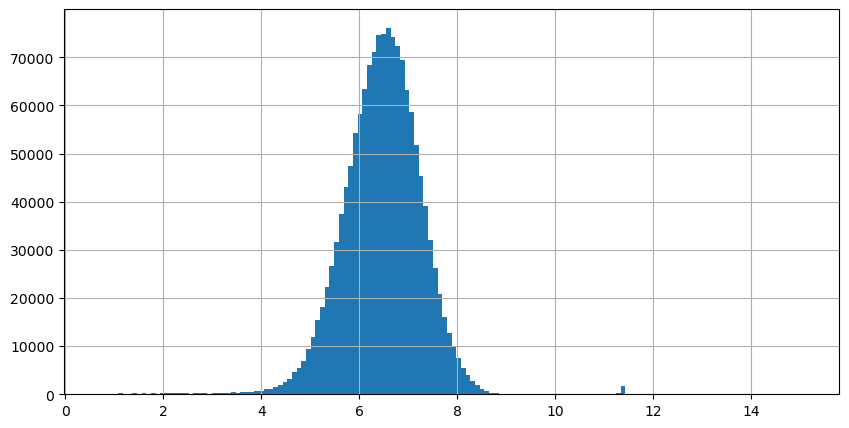

In [34]:
import matplotlib.pyplot as plt

### Your code is here
fig = plt.figure(figsize=(10, 5))
data['log_trip_duration'].hist(bins=150)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

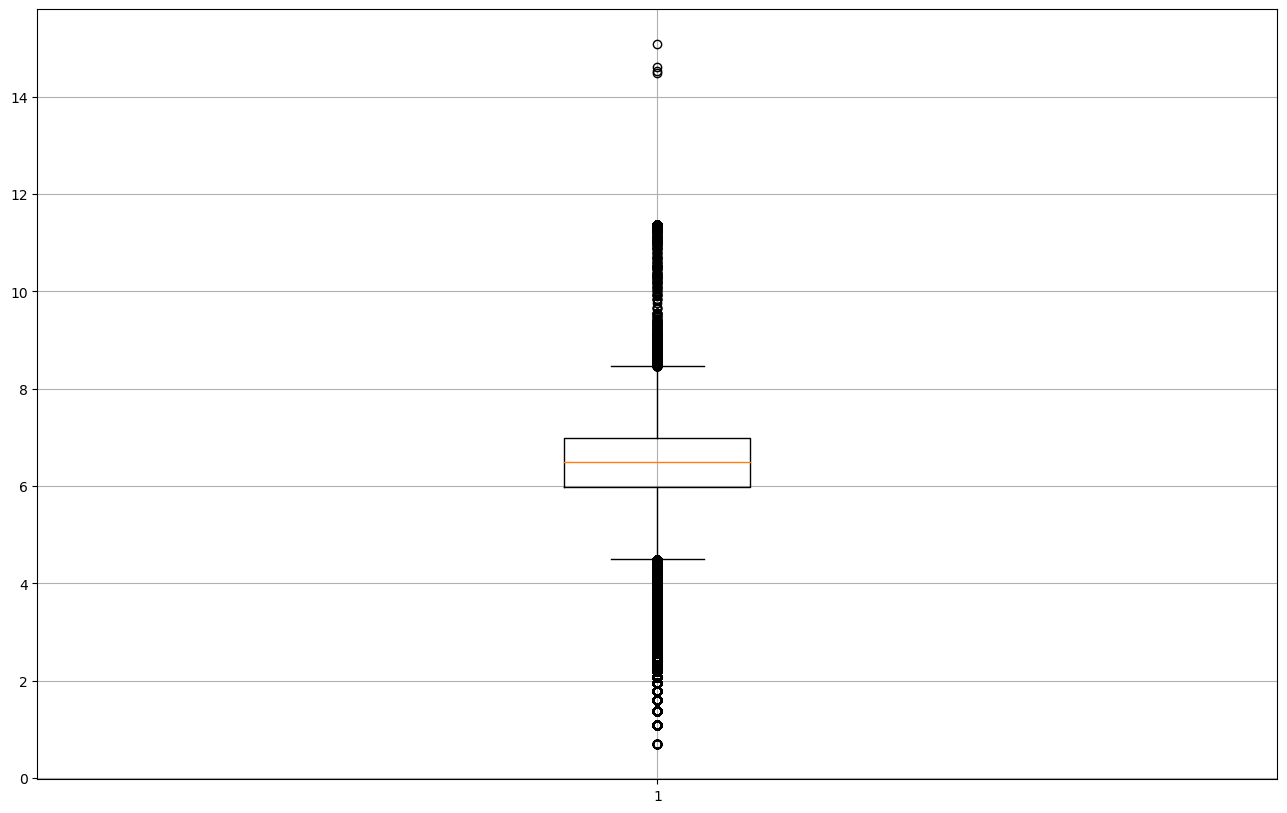

In [38]:
fig = plt.figure(figsize=(16, 10))
plt.boxplot(data['log_trip_duration'])
plt.grid()
plt.show

Есть ли, на ваш взгляд, в данных выбросы?

Кажется, что да!

Давайте почистим их, удалив те объекты, таргеты которых находятся вне промежутка

(топ 99,5% значение;   топ 0,5% значение)

In [42]:
### Your code is here
high_duration = data['log_trip_duration'].quantile(0.995)
low_duration = data['log_trip_duration'].quantile(0.05)

interval = high_duration - low_duration

In [44]:
data = data[data['log_trip_duration'].between(low_duration, high_duration)]

Снова замерьте качество на кросс-валидации, используя старый selector

In [46]:
### Your code is here
X_after_filter = data.drop('log_trip_duration', axis = 1)
y_after_filter = data['log_trip_duration']

model = LinearRegression()


cv_result_after_filter = cross_validate(model, X_after_filter, y_after_filter,
                                        scoring='neg_mean_squared_error',
                                        cv=selector, return_train_score=True)

cross_val_error_after_filter = -np.mean(cv_result_after_filter['test_score'])

print(f'MSE на кросс валидации после фильтрации: {round(cross_val_error_after_filter, 3)}')

MSE на кросс валидации после фильтрации: 0.267
